In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise2/EPYC/size


In [3]:
methods = ['mkl', 'oblas', 'blis']
precision = ['float', 'double']
placement = ['close', 'spread'] # You will have to add master

In [4]:
df = pd.DataFrame(columns=['Size', 'Time', 'GFLOPS', 'precision', 'method', 'placement'])
df

,Size,Time,GFLOPS,precision,method,placement


In [5]:
for pl in placement:
    for m in methods:
        for prec in precision:
            file_pattern = f"{pl}/{m}_{prec}_*.csv"

            # Get a list of file paths matching the pattern
            file_paths = glob.glob(file_pattern)

            # Initialize an empty list to store DataFrames
            dfs = []

            # Loop through each file and read it into a DataFrame, then add it to the list
            for file_path in file_paths:
                df_temp = pd.read_csv(file_path)
                dfs.append(df_temp)

            # Concatenate all DataFrames in the list into a single DataFrame
            df_temp = pd.concat(dfs, ignore_index=True)
            df_temp['precision'] = prec
            df_temp['method'] = m
            df_temp['placement'] = pl

            # Display the combined DataFrame
            df = pd.concat([df, df_temp])

In [6]:
df

,Size,Time,GFLOPS,precision,method,placement
0,17000,7.109605,1382.074029,float,mkl,close
1,17000,7.407318,1326.525985,float,mkl,close
2,17000,7.397149,1328.349593,float,mkl,close
3,17000,7.454979,1318.045365,float,mkl,close
4,17000,7.432920,1321.956936,float,mkl,close
...,...,...,...,...,...,...
90,11000,3.741799,711.422557,double,blis,spread
91,11000,3.763581,707.304998,double,blis,spread
92,11000,3.756946,708.554294,double,blis,spread
93,11000,3.855727,690.401663,double,blis,spread


## Analysis of results with double precision

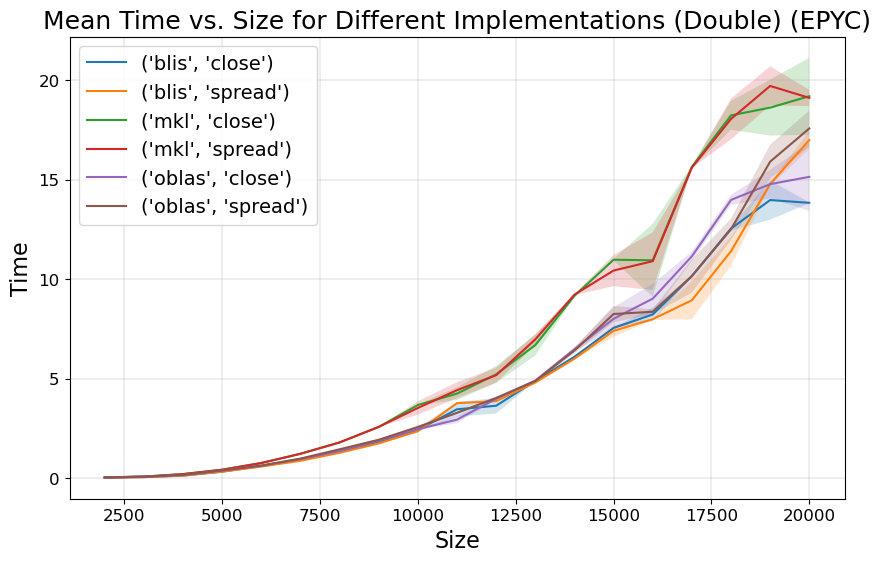

In [8]:
grouped_double = df[df['precision']=='double']
grouped_double.drop(columns=['precision'])

grouped_double = grouped_double.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_double['Time'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)

# Add labels and title
plt.xlabel('Size', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Mean Time vs. Size for Different Implementations (Double) (EPYC)', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

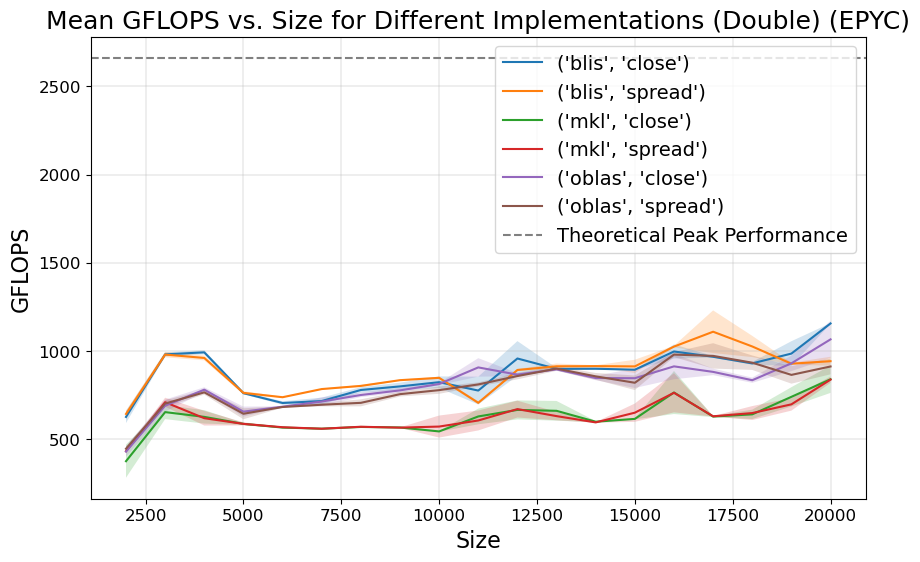

In [10]:
grouped_double = df[df['precision']=='double']
grouped_double.drop(columns=['precision'])

grouped_double = grouped_double.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_double['GFLOPS'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)

plt.axhline(y = 64*2.6*16, color = 'gray', label = "Theoretical Peak Performance", c = "gray", linestyle='dashed')

# Add labels and title
plt.xlabel('Size', fontsize = 16)
plt.ylabel('GFLOPS', fontsize = 16)
plt.title('Mean GFLOPS vs. Size for Different Implementations (Double) (EPYC)', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

- - - 
# Single Precision Results

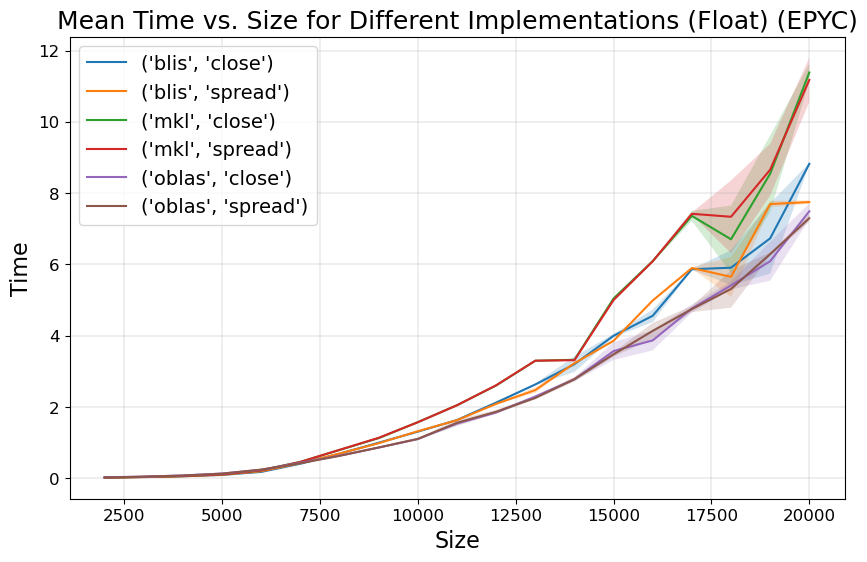

In [12]:
grouped_float = df[df['precision']=='float']
grouped_float.drop(columns=['precision'])

grouped_float = grouped_float.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_float['Time'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)
# Add labels and title
plt.xlabel('Size', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Mean Time vs. Size for Different Implementations (Float) (EPYC)', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

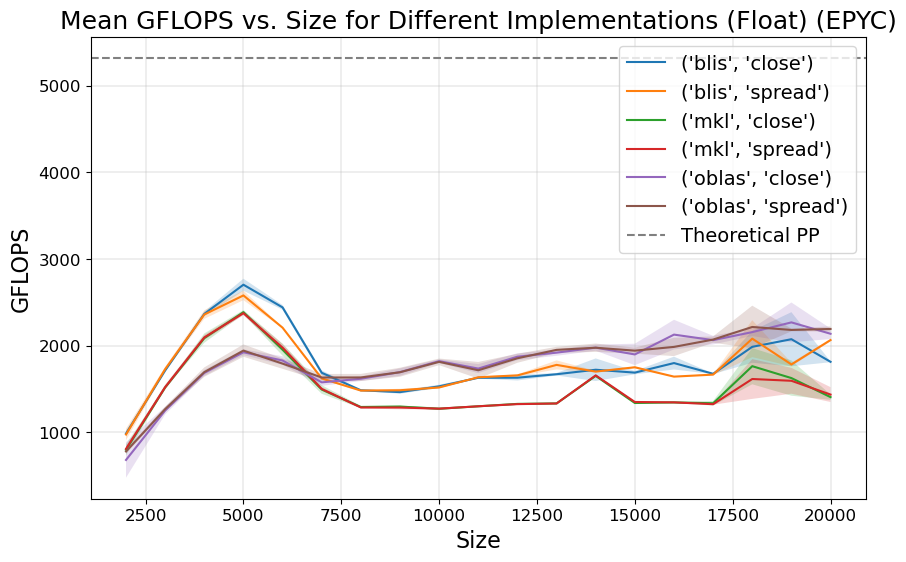

In [13]:
grouped_float = df[df['precision']=='float']
grouped_float.drop(columns=['precision'])

grouped_float = grouped_float.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_float['GFLOPS'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)


# Add labels and title
plt.axhline(y = 64*2.6*32, color = 'b', label = "Theoretical PP", c = "gray", linestyle='dashed')


plt.xlabel('Size', fontsize = 16)
plt.ylabel('GFLOPS', fontsize = 16)
plt.title('Mean GFLOPS vs. Size for Different Implementations (Float) (EPYC)', fontsize = 18)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()